# Logistic Regression and Support Vector Machines

**Author: Jessica Cervi**


## Activity Overview

This activity is designed to consolidate your knowledge about logistic regression and support vector machines (SVMs) from a practical point of view.

In particular, we'll try to  diagnostically predict whether a patient has diabetes by using the `Python` libraries `pandas` and `sklearn`. We will begin by reading the dataset [diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) from Kaggle.


This activity is designed to help you apply the machine learning algorithms you have learned using the packages in `Python`. `Python` concepts, instructions, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the activity. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the activity, we encourage you to compare your work against the solution file to perform a self-assessment.

## Logistic Regression and Support Vector Machines

Logistic regression is a powerful fundamental machine learning method used for classification, but it is built on a regression framework.

Support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis.

### Importing the Dataset and Exploratory Data Analysis (EDA)

We begin by using the library `pandas` to import the dataset. To do so, we import `pandas` first and read the file using the `.read_csv()` function by passing the name of the dataset we want to read as a string. 

Note that the `pandas` has many functions to import different file formats. Here we use the `.read_csv()` function because the dataset is stored in a csv file.

Run the code cell below:

In [21]:
import pandas as pd #import the library


df = pd.read_csv("data/diabetes.csv") #read the dataset

Before performing any algorithm on the dataframe, it's always good practice to perform exploratory data analysis.


### YOUR TURN

We begin by visualizing the first ten rows of the dataframe `df` using the function `.head()`.

Complete the code cell below by passing the desired number of rows to the function `.head()` as an integer.

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Next, we retrieve some more information about our dataframe by using the properties `.shape` and `columns` and the function `.describe()`.

Here's a brief description of what each of the above functions do:

- `.shape`: Returns a tuple representing the dimensionality of the dataframe;
- `.columns`: Returns the column labels of the dataframe;
- `describe()`: Returns a statistical summary of the dataframe.


Run the code cells below to get information about the dataframe.

In [23]:
df.shape

(768, 9)

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Understanding the Problem

Before we start setting up the problem in `Python` using logistic regression and SVMs, it is fundamental to understand which variable we're trying to predict and why the approach we are planning on using may work.

Understanding which variable we are trying to predict is important as we need to split our dataframe `df` into `X` and `y` dataframes. The `X` dataframe will contain all the variables in `df` that will be used to make the prediction; `y` will contain the dependent variable, in this case `Outcome`.

Run the code cell below to create our `X` dataframe and to visualize the first five rows using the command `head()`.

In [26]:
X = df.iloc[:, :-1] #select all the columns in df except the last one

X.head() #visualize the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Next, we need to separate the `"Outcome"` from our original dataframe `df`. 

### YOUR TURN

In the code cell below, fill in the ellipsis with the name of our target variable. Pass the name of the variable as a string.

In [27]:
y = df['Outcome'] # select only the last column in df


Run the code cell below to visualize the first 5 rows of `y`.

In [28]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### Single Feature Visualization

One of the more powerful aspects of machine learning is that predictions can be made based on *many* features. 

That makes it difficult to fully visualize the model that is built. However, it is still good practice and can be helpful to explore lower dimensional dependencies. 


In the code cell below we plot our output as a function of just two features. You can experiment with changing the horizontal and vertical axes to be other features.

Run the code cell below.

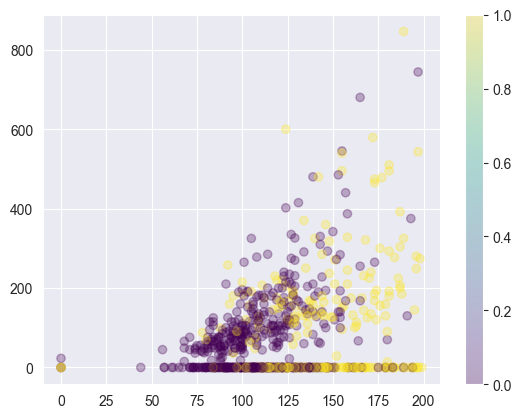

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df["Glucose"],df["Insulin"], c=y, alpha=0.3, cmap='viridis')
plt.colorbar();  # show color scale
plt.show()

### Splitting the Data Into Training and Testing Set

As we have seen in Video 3 for this week, it is important to split the data into *training* and *testing* sets.

As a reminder, the training set is the portion of the original dataset that we use to train the model. The model sees and learns from this data. 

The testing dataset is the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. It is only used once a model is completely trained.

To split the data into a training and testing datasets, we can use the function [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) from `sklearn`. This function splits arrays or matrices into random train and test subsets and returns a list containing train-test split of inputs.

As we observe, in our case, the function `train_test_split` takes four arguments:

- `X`: Input dataframe
- `y`: Outpur dataframe
- `test_size`: Should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split
- `random_state`: Controls the shuffling applied to the data before applying the split. Ensures the reproducibility of the results across multiple function calls

### YOUR TURN

In the code cell below, fill in the ellipsis to set the argument `test_size` equal to `0.25` and `random_state` equal to `0`.

In [30]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)


Next, we print to screen the shape of `X_train` and `X_test`.

Run the code cell below.

In [31]:
X_train.shape

(576, 8)

In [32]:
X_test.shape

(192, 8)

## Setting up the Classifiers and Computing the Scores

The last step involves initializing the classifiers and running the algorithm.

In the code cell below, we've imported the classifiers [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC) from `sklearn`.

Run the code cell below.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [34]:
names = ["Logistic Regression", "Linear SVM"]

classifiers = [
    LogisticRegression(),
    SVC(kernel="linear")]

In the code cell below, we instantiate the `LogisticRegression` classifier and we fit it to our training sets.

Run the code cell below.

In [35]:
log_clf = LogisticRegression(max_iter = 200).fit(X_train, y_train)
log_clf.score(X_train, y_train)

0.7604166666666666

In the code cell below we instatiate the classifier we have imported for SVM.

Compute the score by running the code cell below.

In [36]:
svm_clf = SVC(random_state=0).fit(X_train, y_train)

svm_clf.score(X_train, y_train)

0.7586805555555556

## Testing the Models and Computing their Accuracy

Now it is time to test our model on the testing sets.

In the code cell below, we have used the function `predict()` with the logistic regression classifier `log_clf` to make a prediction on the `y` testing set.

Run the code cell below.

In [37]:
y_eval_lr = log_clf.predict(X_test)

Next, we want to compute the accuracy for this model.

In [38]:
acc = sum(y_eval_lr == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 80.21%


Finally, we are interested in looking at the accuracy of the SVM model. In the code cell below, compute the 
prediction on the testing set `y_eval_svm` by following the code above.

In [39]:
y_eval_svm = svm_clf.predict(X_test)


Run the code cell below to compute the accuracy for this model.

In [40]:
acc = sum(y_eval_svm == y_test) / float(len(y_test))
print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 77.08%
